In [111]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sample', 'dist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [126]:
# choosing which distribution to use
distributions = ['pois', 'gaus', 'chisq', 'binomial', 'lnorm']

# and which mean to give:
mymean = 100
mySTD = 44
# creating 100 sample distributions
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


In [127]:
df = mymean
np.random.seed(98)

In [128]:
# making a dictionary to host the distributions

import numpy as np
# creates md as an empty dictionary
md = {}

# overwrites md with a key for each distribution type
for d in distributions:
    md[d] = {}
    
md

{'binomial': {}, 'chisq': {}, 'gaus': {}, 'lnorm': {}, 'pois': {}}

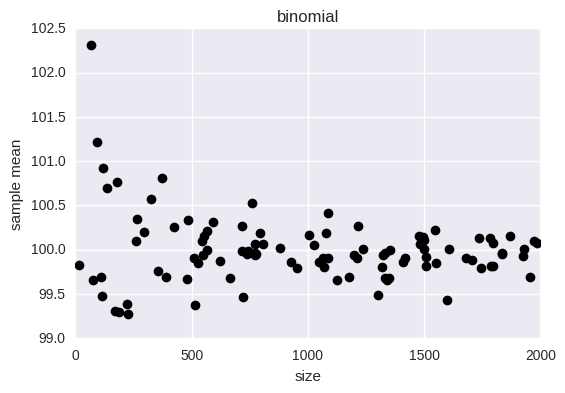

In [131]:
# binomial
k = mymean
p = .5
n = 200
np.random.seed(98)

for i in range(100):
    ran_size = np.random.randint(10, 2000)
    sample = np.random.binomial(n, p, ran_size)
    pl.plot(ran_size, sample.mean(), "o", color="k")
    
# LABEL THIS PLOT
pl.title('binomial')
pl.xlabel('size')
pl.ylabel('sample mean')

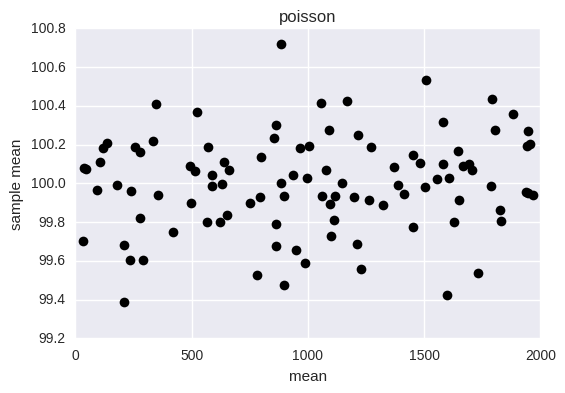

In [132]:
# poisson
lam = df
size = ran_size
np.random.seed(98)

for i in range(100):
    ran_size = np.random.randint(10, 2000)
    sample = np.random.poisson(lam, size)
    pl.plot(ran_size, sample.mean(), "o", color="k")
    
pl.title('poisson')
pl.xlabel('mean')
pl.ylabel('sample mean')

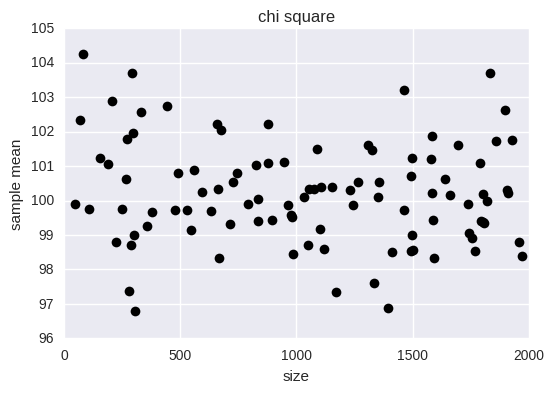

In [125]:
# chi square
np.random.seed(98)

for i in range(100):
    ran_size = np.random.randint(10, 2000)
    sample = np.random.chisquare(df, df)
    pl.plot(ran_size, sample.mean(), "o", color="k")
    
pl.title('chi square')
pl.xlabel('size')
pl.ylabel('sample mean')

In [ ]:
# gaussian

np.random.seed(98)

for i in range(100):
    ran_size = np.random.randint(10, 2000)
    sample = np.random.normal(df, df)
    pl.plot(ran_size, sample.mean(), "o", color="k")
    
pl.title('gaussian')
pl.xlabel('size')
pl.ylabel('sample mean')

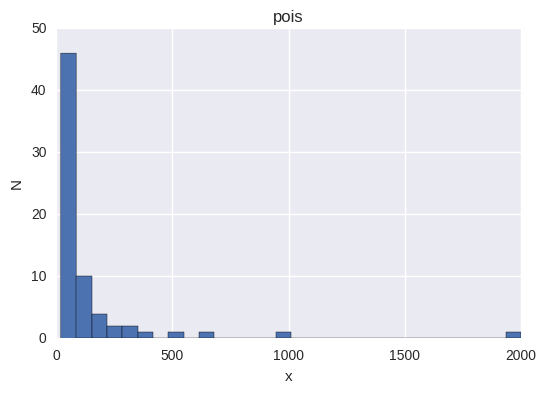

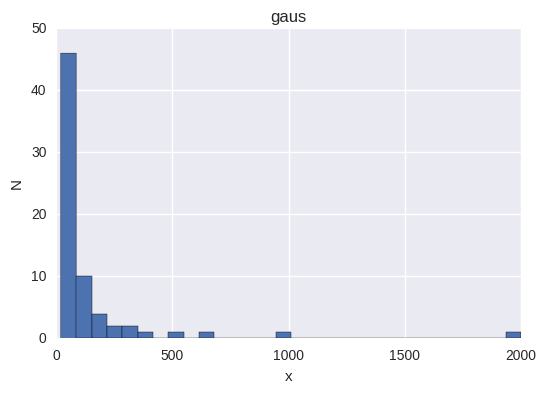

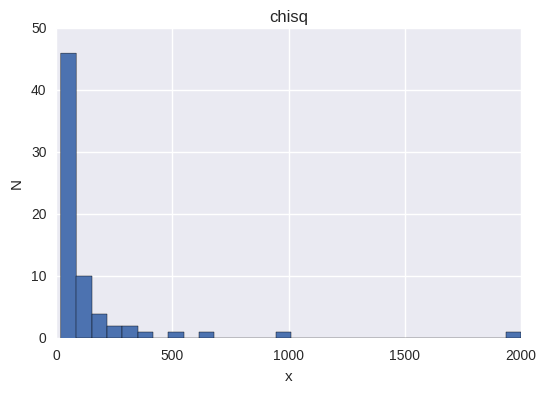

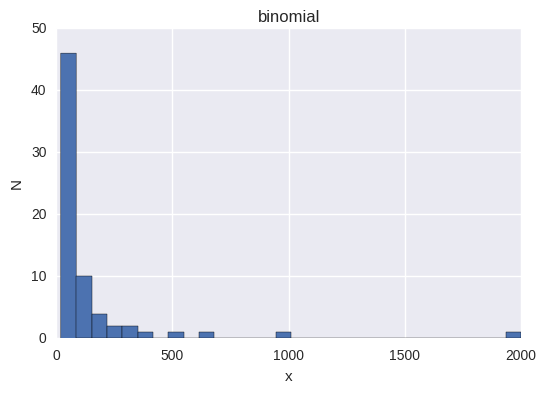

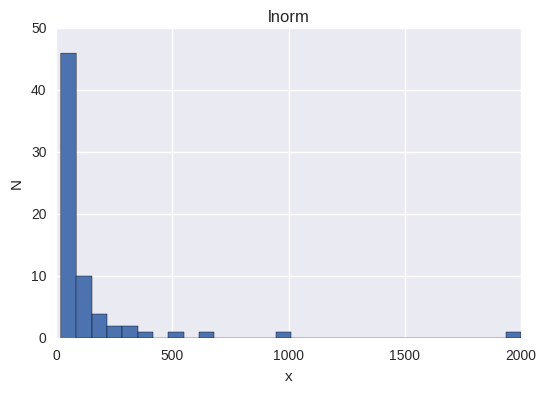

In [105]:
mymean = 100
ran_size = np.random.randint(10,2000)

for n in mysize:
    md['pois'][n] = np.random.poisson(df, ran_size)
    md['gaus'][n] = np.random.normal(loc=0.0, scale=1.0, size=None)
    md['chisq'][n] = np.random.chisquare(df, size=100)
    md['binomial'][n] = np.random.binomial(n, p=.5, size=None)
    md['lnorm'][n] = np.random.lognormal(mean=0.0, sigma=1.0, size=None)

# md now is a dictionary with five objects: arrays with the distribution name keys
for dist in distributions:
    md[dist] = list(md[dist])
    pl.hist(md[dist], bins = 30)
    pl.ylabel('N')
    pl.xlabel('x')
    pl.title(dist)
    pl.show()

In [20]:
# calculate what the mean and stdev of this distribution are
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 99.91, standard deviation: 13.55


In [22]:
# overwrite the dictionary into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)
md['chisq'] = {} 

# adding arrays using for loop
for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)

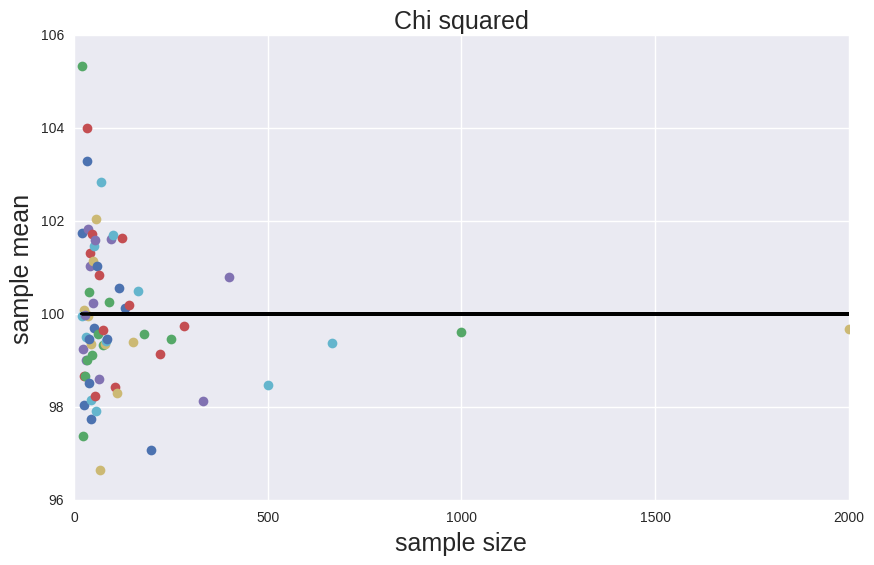

In [24]:
# saving the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
        
pl.title('Figure 2: [describe what you see and how it relates to the law of large numbers]')

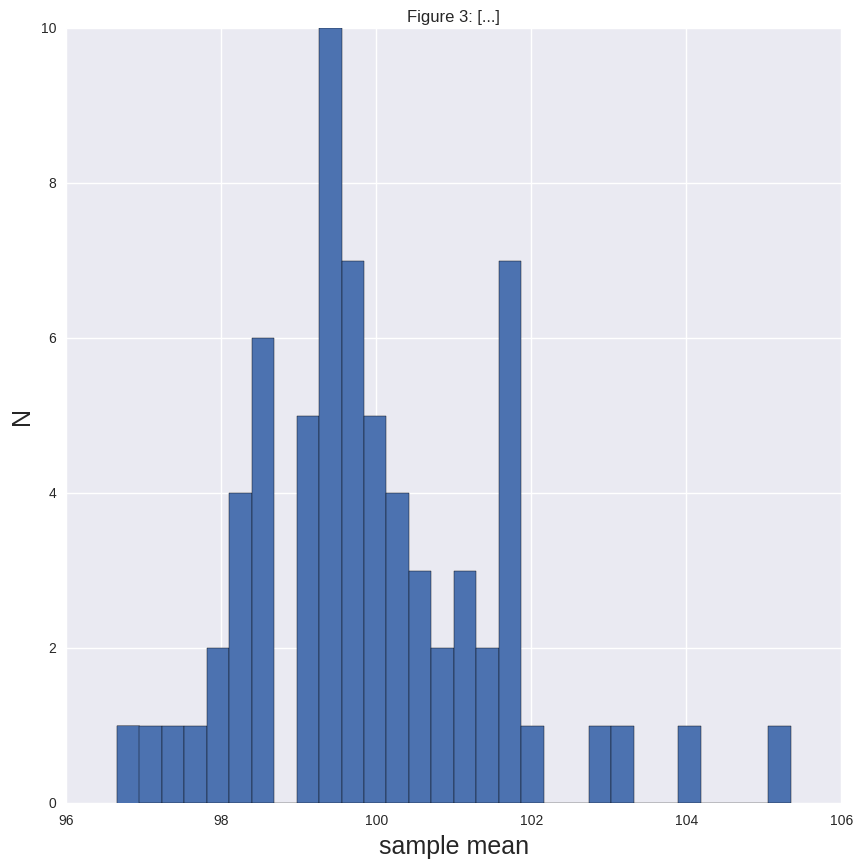

In [26]:
# plotting histogram of the mean of all samples
# by appending each mean in a list using a for loop
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Figure 3: [...]')